In [68]:
import re
import requests
import json
from bs4 import BeautifulSoup
import pandas as pd
import ast
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as mpimg

In [2]:
response=requests.get("https://understat.com/league/EPL")
response.status_code

200

In [3]:
soup=BeautifulSoup(response.content, "html.parser")
ugly_soup=str(soup)

In [4]:
teams_data=re.search("var teamsData .*= JSON.parse\('(.*)'\)", ugly_soup).group(1)

In [5]:
teams_data

'\\x7B\\x2271\\x22\\x3A\\x7B\\x22id\\x22\\x3A\\x2271\\x22,\\x22title\\x22\\x3A\\x22Aston\\x20Villa\\x22,\\x22history\\x22\\x3A\\x5B\\x7B\\x22h_a\\x22\\x3A\\x22h\\x22,\\x22xG\\x22\\x3A0.31860100000000002307132263013045303523540496826171875,\\x22xGA\\x22\\x3A1.4009799999999998920685584380407817661762237548828125,\\x22npxG\\x22\\x3A0.31860100000000002307132263013045303523540496826171875,\\x22npxGA\\x22\\x3A1.4009799999999998920685584380407817661762237548828125,\\x22ppda\\x22\\x3A\\x7B\\x22att\\x22\\x3A227,\\x22def\\x22\\x3A12\\x7D,\\x22ppda_allowed\\x22\\x3A\\x7B\\x22att\\x22\\x3A146,\\x22def\\x22\\x3A24\\x7D,\\x22deep\\x22\\x3A2,\\x22deep_allowed\\x22\\x3A6,\\x22scored\\x22\\x3A0,\\x22missed\\x22\\x3A0,\\x22xpts\\x22\\x3A0.4257999999999999563016217507538385689258575439453125,\\x22result\\x22\\x3A\\x22d\\x22,\\x22date\\x22\\x3A\\x222025\\x2D08\\x2D16\\x2011\\x3A30\\x3A00\\x22,\\x22wins\\x22\\x3A0,\\x22draws\\x22\\x3A1,\\x22loses\\x22\\x3A0,\\x22pts\\x22\\x3A1,\\x22npxGD\\x22\\x3A\\x2D1.08

In [6]:
data=teams_data.encode("utf8").decode("unicode_escape")

In [7]:
data

'{"71":{"id":"71","title":"Aston Villa","history":[{"h_a":"h","xG":0.31860100000000002307132263013045303523540496826171875,"xGA":1.4009799999999998920685584380407817661762237548828125,"npxG":0.31860100000000002307132263013045303523540496826171875,"npxGA":1.4009799999999998920685584380407817661762237548828125,"ppda":{"att":227,"def":12},"ppda_allowed":{"att":146,"def":24},"deep":2,"deep_allowed":6,"scored":0,"missed":0,"xpts":0.4257999999999999563016217507538385689258575439453125,"result":"d","date":"2025-08-16 11:30:00","wins":0,"draws":1,"loses":0,"pts":1,"npxGD":-1.082378999999999980019538270425982773303985595703125},{"h_a":"a","xG":0.97685200000000005360334398574195802211761474609375,"xGA":1.1296399999999999774757952764048241078853607177734375,"npxG":0.97685200000000005360334398574195802211761474609375,"npxGA":1.1296399999999999774757952764048241078853607177734375,"ppda":{"att":92,"def":17},"ppda_allowed":{"att":302,"def":28},"deep":14,"deep_allowed":2,"scored":0,"missed":1,"xpts":1

In [8]:
data=json.loads(data)

In [9]:
data

{'71': {'id': '71',
  'title': 'Aston Villa',
  'history': [{'h_a': 'h',
    'xG': 0.318601,
    'xGA': 1.40098,
    'npxG': 0.318601,
    'npxGA': 1.40098,
    'ppda': {'att': 227, 'def': 12},
    'ppda_allowed': {'att': 146, 'def': 24},
    'deep': 2,
    'deep_allowed': 6,
    'scored': 0,
    'missed': 0,
    'xpts': 0.42579999999999996,
    'result': 'd',
    'date': '2025-08-16 11:30:00',
    'wins': 0,
    'draws': 1,
    'loses': 0,
    'pts': 1,
    'npxGD': -1.082379},
   {'h_a': 'a',
    'xG': 0.976852,
    'xGA': 1.12964,
    'npxG': 0.976852,
    'npxGA': 1.12964,
    'ppda': {'att': 92, 'def': 17},
    'ppda_allowed': {'att': 302, 'def': 28},
    'deep': 14,
    'deep_allowed': 2,
    'scored': 0,
    'missed': 1,
    'xpts': 1.1286999999999998,
    'result': 'l',
    'date': '2025-08-23 14:00:00',
    'wins': 0,
    'draws': 0,
    'loses': 1,
    'pts': 0,
    'npxGD': -0.15278799999999992},
   {'h_a': 'h',
    'xG': 1.20586,
    'xGA': 2.59713,
    'npxG': 1.20586,
   

In [18]:
teams_data = []

In [19]:
for team_id, team_info in data.items():
    # Basic team information
    team_record = {
        'team_id': team_id,
        'team_name': team_info['title'],
        'total_matches': len(team_info['history'])
    }
        # Initialize aggregated stats
    total_stats = {
        'total_xG': 0,
        'total_xGA': 0,
        'total_npxG': 0,
        'total_npxGA': 0,
        'total_deep': 0,
        'total_deep_allowed': 0,
        'total_scored': 0,
        'total_missed': 0,
        'total_xpts': 0,
        'total_wins': 0,
        'total_draws': 0,
        'total_loses': 0,
        'total_pts': 0,
        'total_npxGD': 0
    }
        # Aggregate stats from all matches
    for match in team_info['history']:
        total_stats['total_xG'] += match['xG']
        total_stats['total_xGA'] += match['xGA']
        total_stats['total_npxG'] += match['npxG']
        total_stats['total_npxGA'] += match['npxGA']
        total_stats['total_deep'] += match['deep']
        total_stats['total_deep_allowed'] += match['deep_allowed']
        total_stats['total_scored'] += match['scored']
        total_stats['total_missed'] += match['missed']
        total_stats['total_xpts'] += match['xpts']
        total_stats['total_wins'] += match['wins']
        total_stats['total_draws'] += match['draws']
        total_stats['total_loses'] += match['loses']
        total_stats['total_pts'] += match['pts']
        total_stats['total_npxGD'] += match['npxGD']
        
        # Combine team info with aggregated stats
    team_record.update(total_stats)
    
    # Add calculated averages
    team_record['avg_xG'] = total_stats['total_xG'] / team_record['total_matches']
    team_record['avg_xGA'] = total_stats['total_xGA'] / team_record['total_matches']
    team_record['avg_npxG'] = total_stats['total_npxG'] / team_record['total_matches']
    team_record['avg_npxGA'] = total_stats['total_npxGA'] / team_record['total_matches']
    team_record['avg_xpts'] = total_stats['total_xpts'] / team_record['total_matches']
    team_record['avg_npxGD'] = total_stats['total_npxGD'] / team_record['total_matches']
    
    teams_data.append(team_record)

df = pd.DataFrame(teams_data)
df = df.set_index('team_id')

In [21]:
df=df.reset_index()

In [22]:
df

,team_id,team_name,total_matches,total_xG,total_xGA,total_npxG,total_npxGA,total_deep,total_deep_allowed,total_scored,...,total_draws,total_loses,total_pts,total_npxGD,avg_xG,avg_xGA,avg_npxG,avg_npxGA,avg_xpts,avg_npxGD
0,71,Aston Villa,6,5.160744,8.911374,5.160744,8.150204,47,31,4,...,3,2,6,-2.989460,0.860124,1.485229,0.860124,1.358367,0.885100,-0.498243
1,72,Everton,6,8.037182,7.601080,8.037182,6.078740,49,40,7,...,2,2,8,1.958442,1.339530,1.266847,1.339530,1.013123,1.429667,0.326407
2,73,Bournemouth,6,8.530610,5.699939,7.769446,5.699939,43,28,8,...,2,1,11,2.069507,1.421768,0.949990,1.294908,0.949990,1.778083,0.344918
3,77,Sunderland,6,6.650889,7.126502,5.889718,6.365336,19,46,7,...,2,1,11,-0.475618,1.108482,1.187750,0.981620,1.060889,1.292650,-0.079270
4,78,Crystal Palace,6,12.360080,7.825914,11.598910,7.825914,40,31,8,...,3,0,12,3.772996,2.060013,1.304319,1.933152,1.304319,1.923533,0.628833
5,80,Chelsea,6,11.002672,7.743950,10.241502,7.743950,37,37,11,...,2,2,8,2.497552,1.833779,1.290658,1.706917,1.290658,1.590917,0.416259
6,81,West Ham,6,5.808899,10.149729,5.047729,10.149729,33,40,6,...,1,4,4,-5.102000,0.968150,1.691621,0.841288,1.691621,0.993017,-0.850333
7,82,Tottenham,6,6.953941,7.459156,6.953941,7.459156,42,35,11,...,2,1,11,-0.505215,1.158990,1.243193,1.158990,1.243193,1.314283,-0.084203
8,83,Arsenal,6,10.224444,4.170927,9.463274,4.170927,46,20,12,...,1,1,13,5.292347,1.704074,0.695155,1.577212,0.695155,1.947733,0.882058
9,86,Newcastle United,6,5.753375,4.639542,5.753375,4.639542,36,33,4,...,3,2,6,1.113833,0.958896,0.773257,0.958896,0.773257,1.506700,0.185639


In [23]:
df.columns

Index(['team_id', 'team_name', 'total_matches', 'total_xG', 'total_xGA',
       'total_npxG', 'total_npxGA', 'total_deep', 'total_deep_allowed',
       'total_scored', 'total_missed', 'total_xpts', 'total_wins',
       'total_draws', 'total_loses', 'total_pts', 'total_npxGD', 'avg_xG',
       'avg_xGA', 'avg_npxG', 'avg_npxGA', 'avg_xpts', 'avg_npxGD'],
      dtype='object')

In [26]:
df=df[["team_name","total_matches","total_wins","total_draws","total_loses","total_pts","total_xG","total_xGA","total_scored",
       "total_xpts","avg_xG","avg_xGA","avg_xpts"]]

In [27]:
df

,team_name,total_matches,total_wins,total_draws,total_loses,total_pts,total_xG,total_xGA,total_scored,total_xpts,avg_xG,avg_xGA,avg_xpts
0,Aston Villa,6,1,3,2,6,5.160744,8.911374,4,5.3106,0.860124,1.485229,0.885100
1,Everton,6,2,2,2,8,8.037182,7.601080,7,8.5780,1.339530,1.266847,1.429667
2,Bournemouth,6,3,2,1,11,8.530610,5.699939,8,10.6685,1.421768,0.949990,1.778083
3,Sunderland,6,3,2,1,11,6.650889,7.126502,7,7.7559,1.108482,1.187750,1.292650
4,Crystal Palace,6,3,3,0,12,12.360080,7.825914,8,11.5412,2.060013,1.304319,1.923533
5,Chelsea,6,2,2,2,8,11.002672,7.743950,11,9.5455,1.833779,1.290658,1.590917
6,West Ham,6,1,1,4,4,5.808899,10.149729,6,5.9581,0.968150,1.691621,0.993017
7,Tottenham,6,3,2,1,11,6.953941,7.459156,11,7.8857,1.158990,1.243193,1.314283
8,Arsenal,6,4,1,1,13,10.224444,4.170927,12,11.6864,1.704074,0.695155,1.947733
9,Newcastle United,6,1,3,2,6,5.753375,4.639542,4,9.0402,0.958896,0.773257,1.506700


In [28]:
#xG vs xGA

In [32]:
df["path"]="C:/Users/K Raghunandan/Analyst/Logos/Premier League/" + df["team_name"] + ".png"

C:\Users\K Raghunandan\AppData\Local\Temp\ipykernel_12768\4005771581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["path"]="C:/Users/K Raghunandan/Analyst/Logos/Premier League/" + df["team_name"] + ".png"


In [33]:
df

,team_name,total_matches,total_wins,total_draws,total_loses,total_pts,total_xG,total_xGA,total_scored,total_xpts,avg_xG,avg_xGA,avg_xpts,path
0,Aston Villa,6,1,3,2,6,5.160744,8.911374,4,5.3106,0.860124,1.485229,0.885100,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
1,Everton,6,2,2,2,8,8.037182,7.601080,7,8.5780,1.339530,1.266847,1.429667,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
2,Bournemouth,6,3,2,1,11,8.530610,5.699939,8,10.6685,1.421768,0.949990,1.778083,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
3,Sunderland,6,3,2,1,11,6.650889,7.126502,7,7.7559,1.108482,1.187750,1.292650,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
4,Crystal Palace,6,3,3,0,12,12.360080,7.825914,8,11.5412,2.060013,1.304319,1.923533,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
5,Chelsea,6,2,2,2,8,11.002672,7.743950,11,9.5455,1.833779,1.290658,1.590917,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
6,West Ham,6,1,1,4,4,5.808899,10.149729,6,5.9581,0.968150,1.691621,0.993017,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
7,Tottenham,6,3,2,1,11,6.953941,7.459156,11,7.8857,1.158990,1.243193,1.314283,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
8,Arsenal,6,4,1,1,13,10.224444,4.170927,12,11.6864,1.704074,0.695155,1.947733,C:/Users/K Raghunandan/Analyst/Logos/Premier L...
9,Newcastle United,6,1,3,2,6,5.753375,4.639542,4,9.0402,0.958896,0.773257,1.506700,C:/Users/K Raghunandan/Analyst/Logos/Premier L...


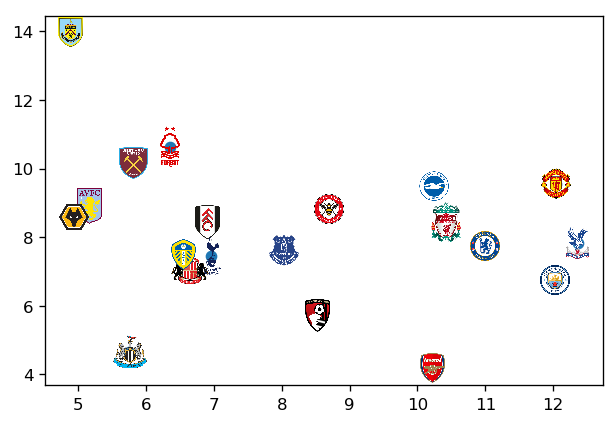

In [38]:
fig, ax = plt.subplots(figsize=(6, 4), dpi=120)
ax.scatter(df["total_xG"], df["total_xGA"])

def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.05, alpha = 1)
    
for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row["path"]), (row["total_xG"], row["total_xGA"]), frameon=False)
    ax.add_artist(ab)

findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not found.
findfont: Font family 'Avenir' not

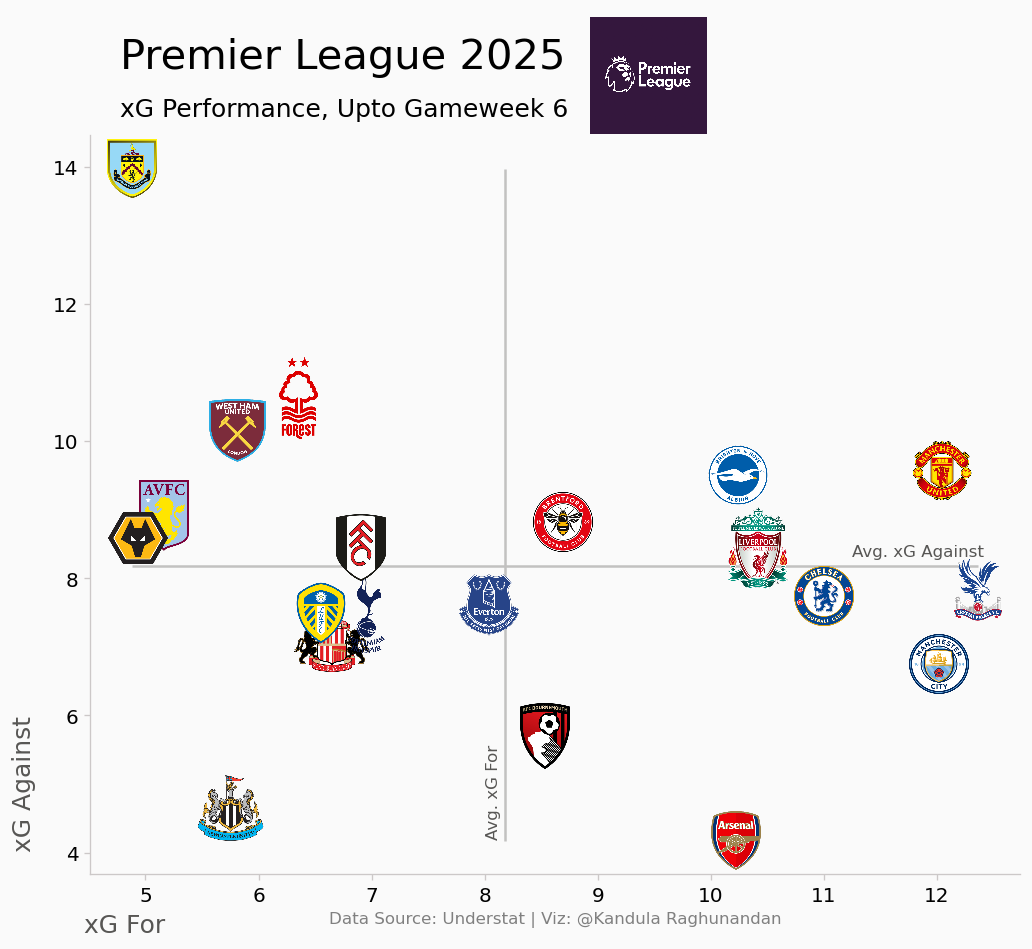

In [89]:
# Set font and background colour
plt.rcParams.update({'font.family':'Avenir'})
bgcol = '#fafafa'

# Create initial plot
fig, ax = plt.subplots(figsize=(10, 8), dpi=120)
fig.set_facecolor(bgcol)
ax.set_facecolor(bgcol)
ax.scatter(df['total_xG'], df['total_xGA'], c=bgcol)

# Change plot spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_color('#ccc8c8')
ax.spines['bottom'].set_color('#ccc8c8')

# Change ticks
plt.tick_params(axis='x', labelsize=12, color='#ccc8c8')
plt.tick_params(axis='y', labelsize=12, color='#ccc8c8')

# Plot badges
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.1, alpha = 1)

for index, row in df.iterrows():
    ab = AnnotationBbox(getImage(row['path']), (row['total_xG'], row['total_xGA']), frameon=False)
    ax.add_artist(ab)

# Add average lines
plt.hlines(df['total_xGA'].mean(), df['total_xG'].min(), df['total_xG'].max(), color='#c2c1c0')
plt.vlines(df['total_xG'].mean(), df['total_xGA'].min(), df['total_xGA'].max(), color='#c2c1c0')

## Title & comment
fig.text(.15,.95,'Premier League 2025',size=25)
fig.text(.15,.90,'xG Performance, Upto Gameweek 6', size=15)

## Avg line explanation
fig.text(.06,.14,'xG Against', size=15, color='#575654',rotation=90)
fig.text(.12,0.05,'xG For', size=15, color='#575654')

## Axes titles
fig.text(.76,.442,'Avg. xG Against', size=10, color='#575654')
fig.text(.455,.15,'Avg. xG For', size=10, color='#575654',rotation=90)

# Adding League Logo
league_logo = mpimg.imread("C:/Users/K Raghunandan/Analyst/Logos/Premier League/Prem Logo.png")

def add_logo(ax, img, zoom, xy):
    imagebox = OffsetImage(img, zoom=zoom)
    ab = AnnotationBbox(imagebox, xy, frameon=False, xycoords='axes fraction')
    ax.add_artist(ab)

add_logo(ax,league_logo,zoom=0.035, xy=(0.6,1.08))

plt.text(
    0.5, -0.06, "Data Source: Understat | Viz: @Kandula Raghunandan",
    ha="center", va="center",
    transform=plt.gca().transAxes,
    fontsize=10, color="gray"
)

plt.savefig("C:/Users/K Raghunandan/Analyst/Results/Prem_Performance_2025.png")